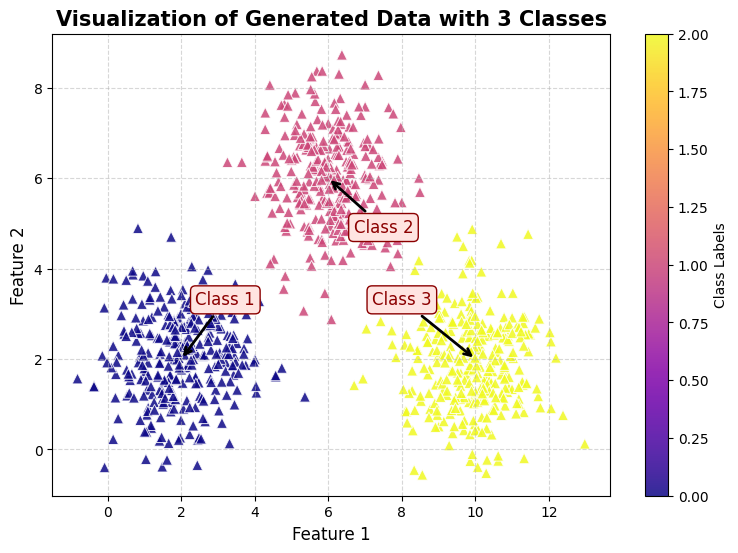

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

def generate_data(samples_per_class=300):
    np.random.seed(32)
    class1 = np.random.randn(samples_per_class, 2) + np.array([2, 2])
    class2 = np.random.randn(samples_per_class, 2) + np.array([6, 6])
    class3 = np.random.randn(samples_per_class, 2) + np.array([10, 2])

    X = np.vstack([class1, class2, class3])
    y = np.array([0] * samples_per_class +
                 [1] * samples_per_class +
                 [2] * samples_per_class)

    return X, y

X, y = generate_data()

encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.4, random_state=32)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=32)

plt.figure(figsize=(9, 6))
scatter = plt.scatter(X[:, 0], X[:, 1],
                      c=y,
                      cmap="plasma",
                      s=60,
                      marker="^",
                      alpha=0.85,
                      edgecolor="white",
                      linewidth=0.7)

centers = [(2, 2), (6, 6), (10, 2)]
offsets = [(1.2, 1.2), (1.5, -1.2), (-2, 1.2)]

for i, (center, offset) in enumerate(zip(centers, offsets)):
    plt.annotate(f'Class {i + 1}',
                 xy=center,
                 xytext=(center[0] + offset[0], center[1] + offset[1]),
                 arrowprops=dict(facecolor='red', arrowstyle='->', lw=2),
                 fontsize=12,
                 color="darkred",
                 ha="center",
                 bbox=dict(boxstyle="round,pad=0.3",
                           edgecolor="darkred",
                           facecolor="mistyrose"))

plt.title("Visualization of Generated Data with 3 Classes", fontsize=15, fontweight="bold")
plt.colorbar(scatter, label="Class Labels")
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


Neural Network and Training

In [9]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        np.random.seed(42)
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        self.W1 = np.random.randn(self.input_size, self.hidden_size) * 0.01
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size) * 0.01
        self.b2 = np.zeros((1, self.output_size))

    def feedforward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = sigmoid(self.Z1)

        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)

        return self.A2

    def backprop(self, X, y):
        m = X.shape[0]

        A2 = self.feedforward(X)

        error = A2 - y

        dZ2 = error * sigmoid_derivative(A2)
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dZ1 = np.dot(dZ2, self.W2.T) * sigmoid_derivative(self.A1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2

        return np.mean(np.square(error))

    def predict(self, X):
        A2 = self.feedforward(X)
        return np.argmax(A2, axis=1)


Error Visualization

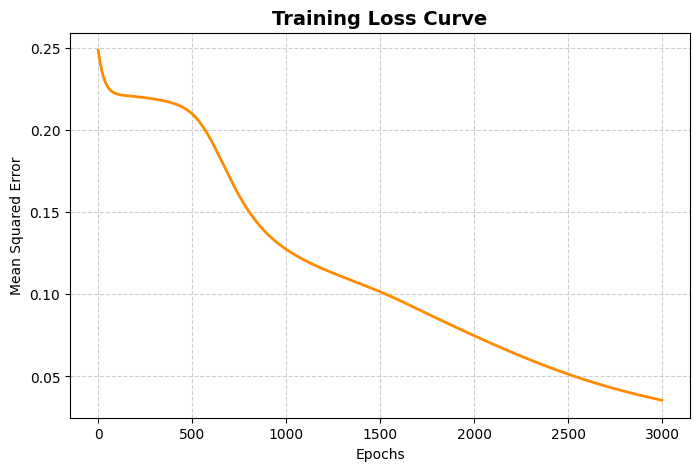

In [10]:
NN = NeuralNetwork(input_size=2, hidden_size=6, output_size=3, learning_rate=0.1)

epochs = 3000
errors = []

for i in range(epochs):
    loss = NN.backprop(X_train, y_train)
    errors.append(loss)

plt.figure(figsize=(8,5))
plt.plot(errors, color="darkorange", linewidth=2)
plt.title("Training Loss Curve", fontsize=14, fontweight="bold")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

Prediction Check

In [11]:
y_pred = NN.predict(X_test)
y_true = np.argmax(y_test, axis=1)

accuracy = np.mean(y_pred == y_true)
print("✅ Test Accuracy:", round(accuracy*100, 2), "%")


✅ Test Accuracy: 100.0 %
